Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

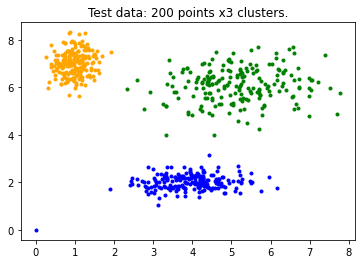

In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

### Set up data

The below cell reads in the data, and defines a function which finds the min/max intervals for a given feature. This will be used later to compute the fuzzy membership function.

In [94]:
df_wine = pd.read_csv('wine_clean.csv')

11.03
14.83


In [73]:
def get_intervals(feature_interval):
    max_interval = max(feature_interval)
    min_interval = min(feature_interval)
    interval_list = [min_interval,(max_interval + min_interval) / 2,max_interval]
    return interval_list

feature_intervals = get_intervals(df_wine['Color intensity'])
print(feature_intervals)

[1.28, 7.14, 13.0]


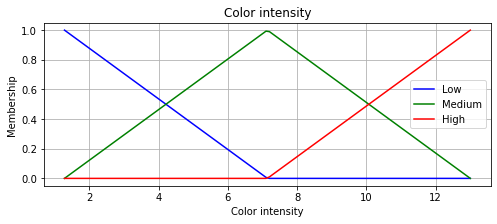

In [72]:
def get_fuzzy_boundaries(intervals,data):
    low = [min(data), min(data), intervals[1]]
    med = [min(data), intervals[1], max(data)]
    high = [intervals[1], max(data), max(data)]
    return [low, med, high]

fuzzy_boundaries = get_fuzzy_boundaries(feature_intervals, df_wine['Color intensity'])
df_wine.sort_values(['Color intensity'], inplace=True)

qual_lo = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[0])
qual_md = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[1])
qual_high = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[2])

fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(df_wine['Color intensity'].values, qual_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(df_wine['Color intensity'].values, qual_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(df_wine['Color intensity'].values, qual_high, 'r', linewidth=1.5, label='High')
ax0.set_title('Color intensity')
ax0.legend()
ax0.grid()
plt.ylabel('Membership')
plt.xlabel('Color intensity')
plt.show()

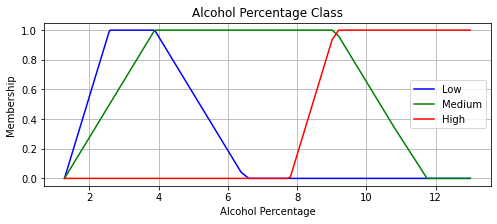

In [112]:
#Color intensity
df_wine.sort_values(['Color intensity'], inplace=True)
feature_name = df_wine['Color intensity']
feature_intervals = np.linspace(min(feature_name), max(feature_name), num=10)

def get_fuzzy_boundaries(intervals,data):
    low = [feature_intervals[0],feature_intervals[1],feature_intervals[2],feature_intervals[4]]
    med = [feature_intervals[0],feature_intervals[2],feature_intervals[6],feature_intervals[8]]
    high = [feature_intervals[5],feature_intervals[6],feature_intervals[9],feature_intervals[9]]
    return [low, med, high]

fuzzy_boundaries = get_fuzzy_boundaries(feature_intervals, feature_name)

qual_lo = fuzz.trapmf(feature_name.values, fuzzy_boundaries[0])
qual_md = fuzz.trapmf(feature_name.values, fuzzy_boundaries[1])
qual_high = fuzz.trapmf(feature_name.values, fuzzy_boundaries[2])

fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(feature_name.values, qual_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(feature_name.values, qual_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(feature_name.values, qual_high, 'r', linewidth=1.5, label='High')
ax0.set_title('Alcohol Percentage Class')
ax0.legend()
ax0.grid()
plt.ylabel('Membership ')
plt.xlabel('Alcohol Percentage')
plt.show()